In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/economic_dataset.csv")
print(df.head())

   interest_rate  unemployment_rate  index_price
0           1.85                6.2        729.0
1           1.81                6.1        793.0
2           1.91                6.1        811.0
3           2.01                6.2        803.0
4           1.86                6.3        849.0


In [16]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


LETS DO VISUALISATION

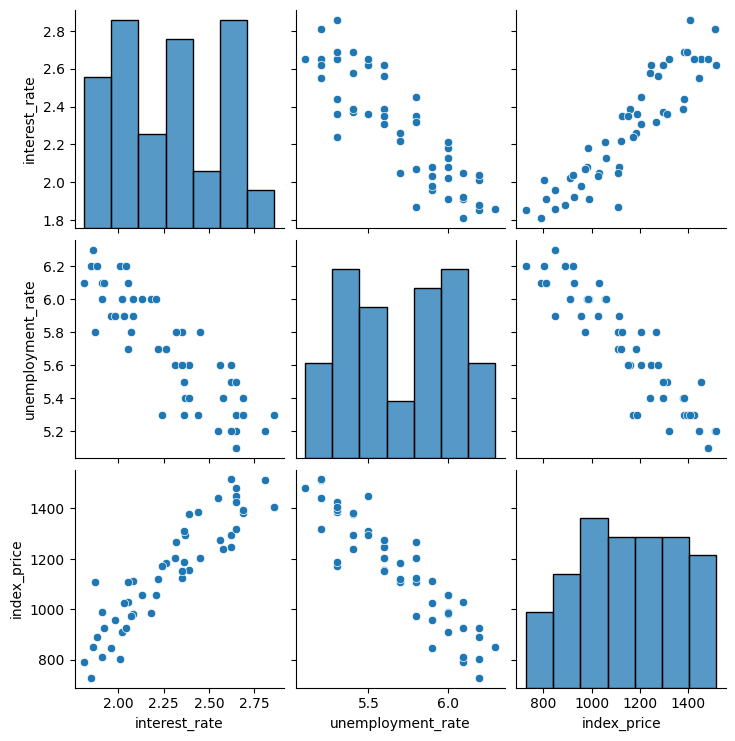

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.862286,0.912329
unemployment_rate,-0.862286,1.000000,-0.913477
index_price,0.912329,-0.913477,1.000000


In [20]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.862286,0.912329
unemployment_rate,-0.862286,1.000000,-0.913477
index_price,0.912329,-0.913477,1.000000


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

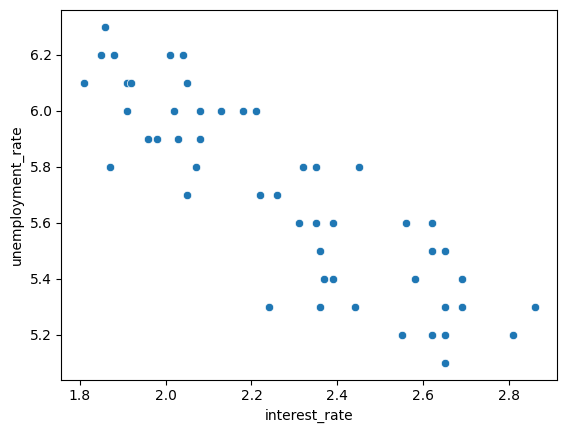

In [22]:
#visualize datapoints more closely

sns.scatterplot(data=df,x="interest_rate",y="unemployment_rate")

In [24]:
#independent and dependent features
X=df[['interest_rate','unemployment_rate']] #or X=df.iloc(:,:-1)-->excludes last column
y=df.iloc[:,-1]

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

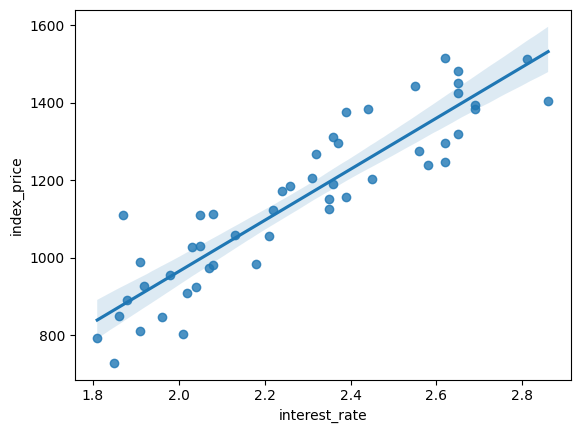

In [30]:
#important graph plot
sns.regplot(x=df['interest_rate'],y=df['index_price'])

In [36]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(25, 2)
(25, 2)


In [37]:
#LR
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
#cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(score)

[-3889.12957648 -5339.06976162 -3812.95701594 -6969.95380172
 -7223.92456674]


In [41]:
np.mean(score)

-5447.006944500429

In [42]:
#prediction
y_pre=regression.predict(X_test)

In [44]:
y_pre

array([812.88850072, 933.09704465, 890.5843286 , 974.87983508,
       831.69912834, 984.89594924, 865.17402239, 867.86053234,
       883.74134147, 844.40681045, 837.32051477, 764.01941462,
       901.33542639, 790.40801299, 791.87292224, 819.48312131,
       936.76184676, 960.70724373, 981.47445568, 806.28882213,
       795.53772434, 822.90461488, 905.73521212, 937.74013892,
       923.56754757])

In [45]:
#preformance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pre)
mae=mean_absolute_error(y_test,y_pre)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

99560.22268024113
284.2646195301806
315.5316508375049


In [53]:
#R2
from sklearn.metrics import r2_score
score_r2=r2_score(y_test,y_pre)
print(score_r2)
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - score_r2) * (n - 1) / (n - p - 1)
print(adjusted_r2)

-1.5669289036394045
-1.8002860766975322


## Assumptions

<Axes: xlabel='index_price'>

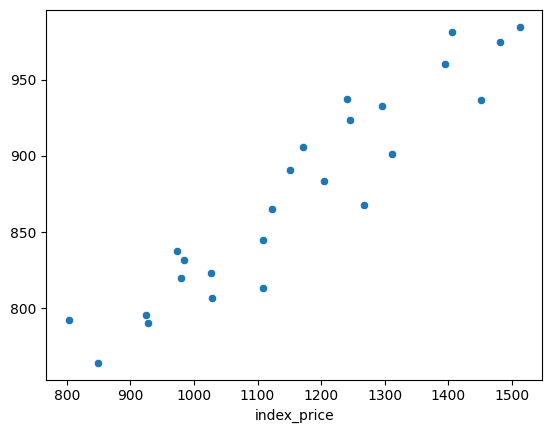

In [58]:
sns.scatterplot(x=y_test,y=y_pre)

In [59]:
residuals=y_test-y_pre
print(residuals)


13    296.111499
39    362.902955
30    260.415671
45    507.120165
17    152.300872
48    527.104051
26    256.825978
25    399.139468
32    320.258659
19    264.593190
12    136.679485
4      84.980585
37    410.664574
8     136.591987
3      11.127078
6     160.516879
41    514.238153
46    434.292756
47    423.525544
15    222.711178
9     129.462276
16    204.095385
24    266.264788
34    302.259861
31    322.432452
Name: index_price, dtype: float64


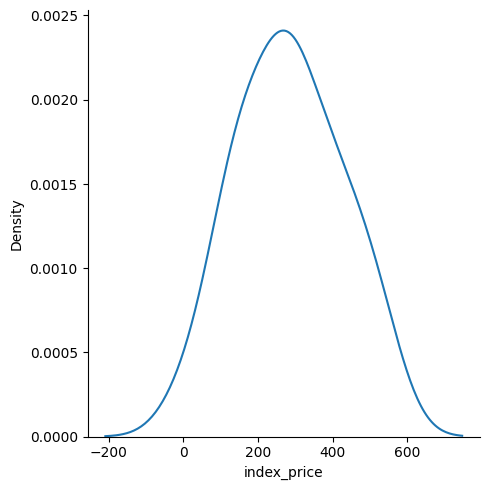

In [60]:
#plot this residuals
sns.displot(residuals,kind='kde')

### USING OLS LINEAR REGRESSION

In [61]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.4004
Date:                Tue, 04 Mar 2025   Prob (F-statistic):                       0.675
Time:                        19:24:04   Log-Likelihood:                         -211.42
No. Observations:                  25   AIC:                                      426.8
Df Residuals:                      23   BIC:                                      429.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           122.1601    570.797      0.214      0.832   -1058.623    1302.943
x2           -95.2950    570.797     -0.167      0.869   -1276.078    1085.488
==============================================================================
Omnibus:                        1.512   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.048
Skew:                          -0.200   Prob(JB):                        0.592
Kurtosis:                       2.080   Cond. No.                         4.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#coeff of regression model--->comparing
print(regression.coef_)

[122.16007026 -95.2949708 ]


In [65]:
#prediction
regression.predict(scaler.transform([[2.52,6]]))

array([873.23355223])